In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pprint import pprint
import os
import re



In [35]:
RESULT_DELIMETER = "T/V                N    NB     P     Q               Time                 Gflops"

def get_parameter_grid(data): 
    
    start = None
    for i, value in enumerate(data):  
        if "The following parameter values will be used:" in value: 
            start = i 
    
    parameter_grid = { }

    for i, line in enumerate(data[start::]): 
        line = line.strip()
        if "----------------" in line: 
            break 
        else: 
            if line != "": 
                # value.split(":")
                value = line.split(":")

                key = value[0].strip()
                value = value[1].strip()
                parameter_grid[key] = value
            
    return parameter_grid
            


def parse_data(data): 
    results = []
    for i, line in enumerate(data): 
        if RESULT_DELIMETER in line: 
            value = data[i+2]
            value = value.split()
            results.append(
                {"N": value[1], 
                "NB": value[2], 
                "P": value[3],
                "Q": value[4],
                "Time": value[5], 
                "Gflops": value[6],})
            
    return results


def get_results(file_name): 
    command = "make logbruh"
    data = None
    with open(file_name) as file: 
        data = file.readlines()
    
    parameter_grid = get_parameter_grid(data)        
    data = parse_data(data)
    # pprint(parameter_grid)
    # pprint(data)
    return pd.DataFrame(data).sort_values(by=["N", "Time"], ascending=[False, True]).reset_index()


x = []
y = []

dir_name = "/Users/rohanjain/Desktop/3rd_Year/Individual Project/Crambor/hpl/Parsers/HPL/22-03-23-results"
for file in sorted(os.listdir(dir_name)): 
    if "out" in file:
        results = get_results(f"{dir_name}/{file}")
        results["Time"] = results["Time"].astype(float)
        # display(results.dtypes)  
        results = results.sort_values(by="Time", ascending=True)
        
        match = re.search(r"^core(\d+)\.out$", file).group(1)

        y.append(float(results.iloc[0]["Time"]))
        x.append(int(match))


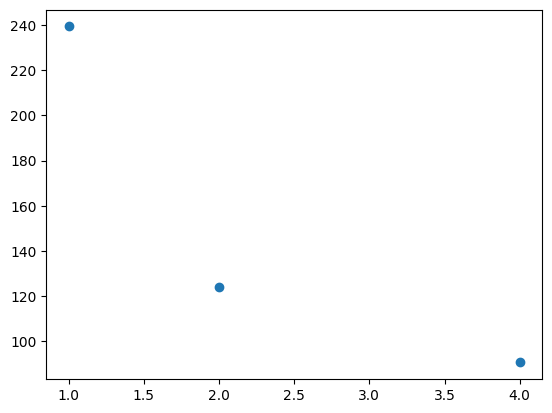

In [36]:
plt.scatter(x,y)

In [ ]:
Nodes 1(24) 2(48) 4(96) 8(192) 16(386) 32(768)
HPCG (GB) 19.3 38.6 77.2 154.5 308.9 617.9
HPL (N) 57920 81920 115840 163840 231680 327680

In [40]:
print(57920**2)
print(81920**2/2)

3354726400
3355443200.0
